In [3]:
import pandas as pd
import numpy as np 

# Object creation

In [5]:
s=pd.Series([1,3,5,np.nan,6,8])
print(s)

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64


In [6]:
dates=pd.date_range('20230101',periods=6)

In [7]:
dates

DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06'],
              dtype='datetime64[ns]', freq='D')

In [8]:
df=pd.DataFrame(np.random.randn(6,4),index=dates,columns=list('ABCD'))

In [9]:
df

,A,B,C,D
2023-01-01,0.174100,0.088418,0.055833,0.446236
2023-01-02,1.605637,-0.054272,-1.156262,0.282200
2023-01-03,0.446185,-1.182972,-0.444222,2.164136
2023-01-04,-0.169842,-0.509929,1.812019,0.238493
2023-01-05,-0.365177,1.413347,-0.723151,-0.422037
2023-01-06,0.374783,0.623017,-0.951765,-2.190277


In [10]:
df2=pd.DataFrame({
    'A':1.0,
    'B':pd.Timestamp('20130102'),
    'C':pd.Series(1,index=list(range(4)),dtype='float32'),
    'D':np.array([3]*4,dtype='int32'),
    'E':pd.Categorical(['test','train','test','train']),
    'F':'foo'
})

In [11]:
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [12]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

# Viewing data

In [13]:
df.head()

,A,B,C,D
2023-01-01,0.174100,0.088418,0.055833,0.446236
2023-01-02,1.605637,-0.054272,-1.156262,0.282200
2023-01-03,0.446185,-1.182972,-0.444222,2.164136
2023-01-04,-0.169842,-0.509929,1.812019,0.238493
2023-01-05,-0.365177,1.413347,-0.723151,-0.422037


In [14]:
df.tail(3)

,A,B,C,D
2023-01-04,-0.169842,-0.509929,1.812019,0.238493
2023-01-05,-0.365177,1.413347,-0.723151,-0.422037
2023-01-06,0.374783,0.623017,-0.951765,-2.190277


In [15]:
df.index

DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06'],
              dtype='datetime64[ns]', freq='D')

In [16]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

## Numpy arrays have one dtype for the entire array 
## while pandas DataFrames have one dtype per column

In [19]:
new_df=df.to_numpy()

In [23]:
new_df.shape

(6, 4)

In [22]:
df.to_numpy()

array([[ 0.17409961,  0.08841787,  0.05583268,  0.44623605],
       [ 1.60563701, -0.05427243, -1.15626217,  0.28220047],
       [ 0.44618521, -1.18297156, -0.44422201,  2.16413611],
       [-0.16984185, -0.50992939,  1.81201922,  0.23849287],
       [-0.36517733,  1.41334729, -0.72315109, -0.42203717],
       [ 0.37478283,  0.62301697, -0.95176526, -2.19027672]])

In [24]:
df2.to_numpy()

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

In [25]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.344281,0.062935,-0.234591,0.086459
std,0.692669,0.898014,1.088064,1.410653
min,-0.365177,-1.182972,-1.156262,-2.190277
25%,-0.083856,-0.396015,-0.894612,-0.256905
50%,0.274441,0.017073,-0.583687,0.260347
75%,0.428335,0.489367,-0.069181,0.405227
max,1.605637,1.413347,1.812019,2.164136


In [26]:
df.T

,2023-01-01,2023-01-02,2023-01-03,2023-01-04,2023-01-05,2023-01-06
A,0.174100,1.605637,0.446185,-0.169842,-0.365177,0.374783
B,0.088418,-0.054272,-1.182972,-0.509929,1.413347,0.623017
C,0.055833,-1.156262,-0.444222,1.812019,-0.723151,-0.951765
D,0.446236,0.282200,2.164136,0.238493,-0.422037,-2.190277


In [27]:
df.sort_index(axis=1,ascending=False)

,D,C,B,A
2023-01-01,0.446236,0.055833,0.088418,0.174100
2023-01-02,0.282200,-1.156262,-0.054272,1.605637
2023-01-03,2.164136,-0.444222,-1.182972,0.446185
2023-01-04,0.238493,1.812019,-0.509929,-0.169842
2023-01-05,-0.422037,-0.723151,1.413347,-0.365177
2023-01-06,-2.190277,-0.951765,0.623017,0.374783


In [28]:
df.sort_values(by='B')

,A,B,C,D
2023-01-03,0.446185,-1.182972,-0.444222,2.164136
2023-01-04,-0.169842,-0.509929,1.812019,0.238493
2023-01-02,1.605637,-0.054272,-1.156262,0.282200
2023-01-01,0.174100,0.088418,0.055833,0.446236
2023-01-06,0.374783,0.623017,-0.951765,-2.190277
2023-01-05,-0.365177,1.413347,-0.723151,-0.422037


# Selection

## Selection by label

In [29]:
df['A']

2023-01-01    0.174100
2023-01-02    1.605637
2023-01-03    0.446185
2023-01-04   -0.169842
2023-01-05   -0.365177
2023-01-06    0.374783
Freq: D, Name: A, dtype: float64

In [30]:
df[0:3]

,A,B,C,D
2023-01-01,0.174100,0.088418,0.055833,0.446236
2023-01-02,1.605637,-0.054272,-1.156262,0.282200
2023-01-03,0.446185,-1.182972,-0.444222,2.164136


In [38]:
df["20230102":"20230104"]

,A,B,C,D
2023-01-02,1.605637,-0.054272,-1.156262,0.282200
2023-01-03,0.446185,-1.182972,-0.444222,2.164136
2023-01-04,-0.169842,-0.509929,1.812019,0.238493


In [39]:
df.loc[dates[0]]

A    0.174100
B    0.088418
C    0.055833
D    0.446236
Name: 2023-01-01 00:00:00, dtype: float64

In [41]:
df.loc[:,['A','B']]

,A,B
2023-01-01,0.174100,0.088418
2023-01-02,1.605637,-0.054272
2023-01-03,0.446185,-1.182972
2023-01-04,-0.169842,-0.509929
2023-01-05,-0.365177,1.413347
2023-01-06,0.374783,0.623017


In [42]:
df.loc['20230102',['A','B']]

A    1.605637
B   -0.054272
Name: 2023-01-02 00:00:00, dtype: float64

In [43]:
df.loc[dates[0],'A']

0.17409961134944768

In [44]:
df.at[dates[0],'A']

0.17409961134944768

## Selection by position

In [45]:
df.iloc[3]

A   -0.169842
B   -0.509929
C    1.812019
D    0.238493
Name: 2023-01-04 00:00:00, dtype: float64

In [46]:
df.iloc[3:5,0:2]

,A,B
2023-01-04,-0.169842,-0.509929
2023-01-05,-0.365177,1.413347


In [47]:
df.iloc[[1,2,4],[0,2]]

,A,C
2023-01-02,1.605637,-1.156262
2023-01-03,0.446185,-0.444222
2023-01-05,-0.365177,-0.723151


In [48]:
df.iloc[:,1:3]

,B,C
2023-01-01,0.088418,0.055833
2023-01-02,-0.054272,-1.156262
2023-01-03,-1.182972,-0.444222
2023-01-04,-0.509929,1.812019
2023-01-05,1.413347,-0.723151
2023-01-06,0.623017,-0.951765


In [49]:
df.iloc[1:3,:]

,A,B,C,D
2023-01-02,1.605637,-0.054272,-1.156262,0.282200
2023-01-03,0.446185,-1.182972,-0.444222,2.164136


In [50]:
df.iloc[1,1]

-0.05427243421100442

In [51]:
df.iat[1,1]

-0.05427243421100442

## Boolean indexing

In [52]:
df[df['A']>0]

,A,B,C,D
2023-01-01,0.174100,0.088418,0.055833,0.446236
2023-01-02,1.605637,-0.054272,-1.156262,0.282200
2023-01-03,0.446185,-1.182972,-0.444222,2.164136
2023-01-06,0.374783,0.623017,-0.951765,-2.190277


In [53]:
df[df>0]

,A,B,C,D
2023-01-01,0.174100,0.088418,0.055833,0.446236
2023-01-02,1.605637,NaN,NaN,0.282200
2023-01-03,0.446185,NaN,NaN,2.164136
2023-01-04,NaN,NaN,1.812019,0.238493
2023-01-05,NaN,1.413347,NaN,NaN
2023-01-06,0.374783,0.623017,NaN,NaN


In [54]:
df2=df.copy()

In [55]:
df2['E']=['one','one','two','three','four','three']

In [56]:
df2

,A,B,C,D,E
2023-01-01,0.174100,0.088418,0.055833,0.446236,one
2023-01-02,1.605637,-0.054272,-1.156262,0.282200,one
2023-01-03,0.446185,-1.182972,-0.444222,2.164136,two
2023-01-04,-0.169842,-0.509929,1.812019,0.238493,three
2023-01-05,-0.365177,1.413347,-0.723151,-0.422037,four
2023-01-06,0.374783,0.623017,-0.951765,-2.190277,three


In [57]:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2023-01-03,0.446185,-1.182972,-0.444222,2.164136,two
2023-01-05,-0.365177,1.413347,-0.723151,-0.422037,four


# Setting

In [66]:
s1=pd.Series([1,2,3,4,5,6],index=pd.date_range('20230101',periods=6))

In [67]:
s1

2023-01-01    1
2023-01-02    2
2023-01-03    3
2023-01-04    4
2023-01-05    5
2023-01-06    6
Freq: D, dtype: int64

In [68]:
df['F']=s1

In [69]:
df

,A,B,C,D,F
2023-01-01,0.174100,0.088418,0.055833,0.446236,1
2023-01-02,1.605637,-0.054272,-1.156262,0.282200,2
2023-01-03,0.446185,-1.182972,-0.444222,2.164136,3
2023-01-04,-0.169842,-0.509929,1.812019,0.238493,4
2023-01-05,-0.365177,1.413347,-0.723151,-0.422037,5
2023-01-06,0.374783,0.623017,-0.951765,-2.190277,6


In [71]:
df.at[dates[0],'A']=0

In [72]:
df.iat[0,1]=0

In [73]:
df

,A,B,C,D,F
2023-01-01,0.000000,0.000000,0.055833,0.446236,1
2023-01-02,1.605637,-0.054272,-1.156262,0.282200,2
2023-01-03,0.446185,-1.182972,-0.444222,2.164136,3
2023-01-04,-0.169842,-0.509929,1.812019,0.238493,4
2023-01-05,-0.365177,1.413347,-0.723151,-0.422037,5
2023-01-06,0.374783,0.623017,-0.951765,-2.190277,6


In [74]:
df.loc[:,'D']=np.array([5]*len(df))

In [75]:
df

,A,B,C,D,F
2023-01-01,0.000000,0.000000,0.055833,5,1
2023-01-02,1.605637,-0.054272,-1.156262,5,2
2023-01-03,0.446185,-1.182972,-0.444222,5,3
2023-01-04,-0.169842,-0.509929,1.812019,5,4
2023-01-05,-0.365177,1.413347,-0.723151,5,5
2023-01-06,0.374783,0.623017,-0.951765,5,6


In [76]:
df2=df.copy()

In [77]:
df2

,A,B,C,D,F
2023-01-01,0.000000,0.000000,0.055833,5,1
2023-01-02,1.605637,-0.054272,-1.156262,5,2
2023-01-03,0.446185,-1.182972,-0.444222,5,3
2023-01-04,-0.169842,-0.509929,1.812019,5,4
2023-01-05,-0.365177,1.413347,-0.723151,5,5
2023-01-06,0.374783,0.623017,-0.951765,5,6


In [79]:
df2[df2>0]=-df2

In [80]:
df2

,A,B,C,D,F
2023-01-01,0.000000,0.000000,-0.055833,-5,-1
2023-01-02,-1.605637,-0.054272,-1.156262,-5,-2
2023-01-03,-0.446185,-1.182972,-0.444222,-5,-3
2023-01-04,-0.169842,-0.509929,-1.812019,-5,-4
2023-01-05,-0.365177,-1.413347,-0.723151,-5,-5
2023-01-06,-0.374783,-0.623017,-0.951765,-5,-6


# Missing data

In [81]:
df1=df.reindex(index=dates[0:4],columns=list(df.columns)+['E'])

In [82]:
df1

,A,B,C,D,F,E
2023-01-01,0.000000,0.000000,0.055833,5,1,NaN
2023-01-02,1.605637,-0.054272,-1.156262,5,2,NaN
2023-01-03,0.446185,-1.182972,-0.444222,5,3,NaN
2023-01-04,-0.169842,-0.509929,1.812019,5,4,NaN


In [83]:
df1.loc[dates[0]:dates[1],'E']=1

In [84]:
df1

,A,B,C,D,F,E
2023-01-01,0.000000,0.000000,0.055833,5,1,1.0
2023-01-02,1.605637,-0.054272,-1.156262,5,2,1.0
2023-01-03,0.446185,-1.182972,-0.444222,5,3,NaN
2023-01-04,-0.169842,-0.509929,1.812019,5,4,NaN


In [85]:
df1.dropna(how='any')

,A,B,C,D,F,E
2023-01-01,0.000000,0.000000,0.055833,5,1,1.0
2023-01-02,1.605637,-0.054272,-1.156262,5,2,1.0


In [86]:
df1.fillna(value=5)

,A,B,C,D,F,E
2023-01-01,0.000000,0.000000,0.055833,5,1,1.0
2023-01-02,1.605637,-0.054272,-1.156262,5,2,1.0
2023-01-03,0.446185,-1.182972,-0.444222,5,3,5.0
2023-01-04,-0.169842,-0.509929,1.812019,5,4,5.0


In [87]:
pd.isna(df1)

,A,B,C,D,F,E
2023-01-01,False,False,False,False,False,False
2023-01-02,False,False,False,False,False,False
2023-01-03,False,False,False,False,False,True
2023-01-04,False,False,False,False,False,True


# Operations

In [88]:
df.mean()

A    0.315264
B    0.048198
C   -0.234591
D    5.000000
F    3.500000
dtype: float64

In [89]:
df.mean(1)

2023-01-01    1.211167
2023-01-02    1.479020
2023-01-03    1.363798
2023-01-04    2.026450
2023-01-05    2.065004
2023-01-06    2.209207
Freq: D, dtype: float64

In [94]:
s=pd.Series([1,3,5,np.nan,6,8],index=dates).shift(2)

In [95]:
s

2023-01-01    NaN
2023-01-02    NaN
2023-01-03    1.0
2023-01-04    3.0
2023-01-05    5.0
2023-01-06    NaN
Freq: D, dtype: float64

In [96]:
df.sub(s,axis='index')

,A,B,C,D,F
2023-01-01,NaN,NaN,NaN,NaN,NaN
2023-01-02,NaN,NaN,NaN,NaN,NaN
2023-01-03,-0.553815,-2.182972,-1.444222,4.0,2.0
2023-01-04,-3.169842,-3.509929,-1.187981,2.0,1.0
2023-01-05,-5.365177,-3.586653,-5.723151,0.0,0.0
2023-01-06,NaN,NaN,NaN,NaN,NaN


## Apply

In [97]:
df.apply(np.cumsum)

,A,B,C,D,F
2023-01-01,0.000000,0.000000,0.055833,5,1
2023-01-02,1.605637,-0.054272,-1.100429,10,3
2023-01-03,2.051822,-1.237244,-1.544651,15,6
2023-01-04,1.881980,-1.747173,0.267368,20,10
2023-01-05,1.516803,-0.333826,-0.455783,25,15
2023-01-06,1.891586,0.289191,-1.407549,30,21


In [98]:
df.apply(lambda x:x.max()-x.min())

A    1.970814
B    2.596319
C    2.968281
D    0.000000
F    5.000000
dtype: float64

# Histogramming

In [99]:
s=pd.Series(np.random.randint(0,7,size=10))

In [100]:
s

0    1
1    1
2    3
3    5
4    1
5    1
6    2
7    3
8    0
9    2
dtype: int64

In [101]:
s.value_counts()

1    4
3    2
2    2
5    1
0    1
dtype: int64

# String method

In [102]:
s=pd.Series(['A','B','C','AaBa',np.nan,'CABA','dog','cat'])

In [103]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4     NaN
5    caba
6     dog
7     cat
dtype: object

# Merge

In [104]:
df=pd.DataFrame(np.random.randn(10,4))

In [105]:
df

,0,1,2,3
0,1.863694,0.206371,-0.398339,-0.869225
1,-1.132176,-0.466792,-0.161470,-0.978833
2,-0.299106,0.583374,-0.006294,-0.036006
3,-0.914741,0.872275,0.601104,-0.475835
4,-0.633256,-0.590095,0.554766,-0.527145
5,0.530361,1.117534,-0.632358,1.268065
6,0.151941,-1.161902,0.539214,-2.336403
7,1.608416,-1.330828,-0.273800,-0.962781
8,0.608591,1.176816,0.922805,0.541116
9,-1.028386,-2.226894,-1.444326,0.331866


In [106]:
pieces=[df[:3],df[3:7],df[7:]]

In [107]:
pieces

[          0         1         2         3
 0  1.863694  0.206371 -0.398339 -0.869225
 1 -1.132176 -0.466792 -0.161470 -0.978833
 2 -0.299106  0.583374 -0.006294 -0.036006,
           0         1         2         3
 3 -0.914741  0.872275  0.601104 -0.475835
 4 -0.633256 -0.590095  0.554766 -0.527145
 5  0.530361  1.117534 -0.632358  1.268065
 6  0.151941 -1.161902  0.539214 -2.336403,
           0         1         2         3
 7  1.608416 -1.330828 -0.273800 -0.962781
 8  0.608591  1.176816  0.922805  0.541116
 9 -1.028386 -2.226894 -1.444326  0.331866]

In [108]:
pd.concat(pieces)

,0,1,2,3
0,1.863694,0.206371,-0.398339,-0.869225
1,-1.132176,-0.466792,-0.161470,-0.978833
2,-0.299106,0.583374,-0.006294,-0.036006
3,-0.914741,0.872275,0.601104,-0.475835
4,-0.633256,-0.590095,0.554766,-0.527145
5,0.530361,1.117534,-0.632358,1.268065
6,0.151941,-1.161902,0.539214,-2.336403
7,1.608416,-1.330828,-0.273800,-0.962781
8,0.608591,1.176816,0.922805,0.541116
9,-1.028386,-2.226894,-1.444326,0.331866


# Join

In [111]:
left=pd.DataFrame({
    'key':['foo','foo'],
    'lval':[1,2]
})

In [112]:
left

,key,lval
0,foo,1
1,foo,2


In [113]:
right=pd.DataFrame({
    'key':['foo','foo'],
    'rval':[4,5]
})

In [114]:
right

,key,rval
0,foo,4
1,foo,5


In [115]:
pd.merge(left,right,on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


# Grouping

In [116]:
df=pd.DataFrame({
     "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
        "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
        "C": np.random.randn(8),
        "D": np.random.randn(8),
})

In [117]:
df

,A,B,C,D
0,foo,one,1.032837,-2.298022
1,bar,one,-1.196141,-1.486630
2,foo,two,1.202830,0.153544
3,bar,three,-0.894836,0.627091
4,foo,two,1.400252,0.753085
5,bar,two,-0.627470,-0.010572
6,foo,one,-1.698741,-1.176787
7,foo,three,0.534115,0.049135


In [118]:
df.groupby('A').sum()

,C,D
A,,
bar,-2.718448,-0.870111
foo,2.471293,-2.519045


In [119]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one   -1.196141 -1.486630
    three -0.894836  0.627091
    two   -0.627470 -0.010572
foo one   -0.665904 -3.474808
    three  0.534115  0.049135
    two    2.603082  0.906629

# Reshaping

In [121]:
tuples=list(
    zip(
        *[
            ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
            ["one", "two", "one", "two", "one", "two", "one", "two"],
        ]
    )
)

In [122]:
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [123]:
index=pd.MultiIndex.from_tuples(tuples,names=['first','second'])

In [124]:
index

MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second'])

In [126]:
df=pd.DataFrame(np.random.randn(8,2),index=index,columns=['A','B'])

In [127]:
df

A         B
first second                    
bar   one     0.842657 -0.188541
      two     0.493390 -0.811420
baz   one    -0.939007  1.399330
      two    -0.506081  0.499382
foo   one    -0.444623  0.281627
      two     0.648651  0.750994
qux   one    -0.296412 -1.006550
      two    -2.218676 -0.000128

In [128]:
df2=df[:4]

In [129]:
df2

A         B
first second                    
bar   one     0.842657 -0.188541
      two     0.493390 -0.811420
baz   one    -0.939007  1.399330
      two    -0.506081  0.499382

In [130]:
stacked=df2.stack()

In [131]:
stacked

first  second   
bar    one     A    0.842657
               B   -0.188541
       two     A    0.493390
               B   -0.811420
baz    one     A   -0.939007
               B    1.399330
       two     A   -0.506081
               B    0.499382
dtype: float64

In [132]:
stacked.unstack()

A         B
first second                    
bar   one     0.842657 -0.188541
      two     0.493390 -0.811420
baz   one    -0.939007  1.399330
      two    -0.506081  0.499382

In [133]:
stacked.unstack(1)

second        one       two
first                      
bar   A  0.842657  0.493390
      B -0.188541 -0.811420
baz   A -0.939007 -0.506081
      B  1.399330  0.499382

In [134]:
stacked.unstack(0)

first          bar       baz
second                      
one    A  0.842657 -0.939007
       B -0.188541  1.399330
two    A  0.493390 -0.506081
       B -0.811420  0.499382

# Pivot tables

In [135]:
df=pd.DataFrame({
     "A": ["one", "one", "two", "three"] * 3,
        "B": ["A", "B", "C"] * 4,
        "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,
        "D": np.random.randn(12),
        "E": np.random.randn(12),
})

In [136]:
df

,A,B,C,D,E
0,one,A,foo,0.542656,1.324877
1,one,B,foo,-0.959096,0.300727
2,two,C,foo,0.992392,0.169497
3,three,A,bar,-0.474200,-0.858212
4,one,B,bar,-2.213513,-1.103030
5,one,C,bar,-0.039954,-0.083094
6,two,A,foo,-1.253629,0.517318
7,three,B,foo,-0.482389,0.579498
8,one,C,foo,-0.393888,0.172586
9,one,A,bar,-1.331091,0.449637


In [137]:
pd.pivot_table(df,values='D',index=['A','B'],columns=['C'])

C             bar       foo
A     B                    
one   A -1.331091  0.542656
      B -2.213513 -0.959096
      C -0.039954 -0.393888
three A -0.474200       NaN
      B       NaN -0.482389
      C  1.620941       NaN
two   A       NaN -1.253629
      B -0.329376       NaN
      C       NaN  0.992392

# Time series

In [139]:
rng=pd.date_range('1/1/2012',periods=100,freq='S') 

In [141]:
ts=pd.Series(np.random.randint(0,500,len(rng)),index=rng)

In [143]:
ts.head()

2012-01-01 00:00:00    364
2012-01-01 00:00:01    310
2012-01-01 00:00:02    310
2012-01-01 00:00:03    132
2012-01-01 00:00:04    142
Freq: S, dtype: int64

In [144]:
ts.resample('5Min').sum()

2012-01-01    22413
Freq: 5T, dtype: int64

In [145]:
ts_utc=ts.tz_localize('UTC')

In [146]:
ts_utc

2012-01-01 00:00:00+00:00    364
2012-01-01 00:00:01+00:00    310
2012-01-01 00:00:02+00:00    310
2012-01-01 00:00:03+00:00    132
2012-01-01 00:00:04+00:00    142
                            ... 
2012-01-01 00:01:35+00:00     31
2012-01-01 00:01:36+00:00    109
2012-01-01 00:01:37+00:00    325
2012-01-01 00:01:38+00:00    312
2012-01-01 00:01:39+00:00    207
Freq: S, Length: 100, dtype: int64

In [147]:
ts_utc.tz_convert('US/Eastern')

2011-12-31 19:00:00-05:00    364
2011-12-31 19:00:01-05:00    310
2011-12-31 19:00:02-05:00    310
2011-12-31 19:00:03-05:00    132
2011-12-31 19:00:04-05:00    142
                            ... 
2011-12-31 19:01:35-05:00     31
2011-12-31 19:01:36-05:00    109
2011-12-31 19:01:37-05:00    325
2011-12-31 19:01:38-05:00    312
2011-12-31 19:01:39-05:00    207
Freq: S, Length: 100, dtype: int64

In [148]:
rng=pd.date_range('1/1/2012',periods=5,freq='M')

In [149]:
ts=pd.Series(np.random.randn(len(rng)),index=rng)

In [150]:
ts

2012-01-31   -0.157421
2012-02-29   -0.615323
2012-03-31    0.787712
2012-04-30   -0.542187
2012-05-31    1.076792
Freq: M, dtype: float64

In [151]:
ps=ts.to_period()

In [152]:
ps

2012-01   -0.157421
2012-02   -0.615323
2012-03    0.787712
2012-04   -0.542187
2012-05    1.076792
Freq: M, dtype: float64

In [153]:
ps.to_timestamp()

2012-01-01   -0.157421
2012-02-01   -0.615323
2012-03-01    0.787712
2012-04-01   -0.542187
2012-05-01    1.076792
Freq: MS, dtype: float64

In [154]:
prng=pd.period_range('1991Q1','2000Q4',freq='Q-NOV')

In [155]:
prng

PeriodIndex(['1991Q1', '1991Q2', '1991Q3', '1991Q4', '1992Q1', '1992Q2',
             '1992Q3', '1992Q4', '1993Q1', '1993Q2', '1993Q3', '1993Q4',
             '1994Q1', '1994Q2', '1994Q3', '1994Q4', '1995Q1', '1995Q2',
             '1995Q3', '1995Q4', '1996Q1', '1996Q2', '1996Q3', '1996Q4',
             '1997Q1', '1997Q2', '1997Q3', '1997Q4', '1998Q1', '1998Q2',
             '1998Q3', '1998Q4', '1999Q1', '1999Q2', '1999Q3', '1999Q4',
             '2000Q1', '2000Q2', '2000Q3', '2000Q4'],
            dtype='period[Q-NOV]')

In [156]:
ts=pd.Series(np.random.randn(len(prng)),prng)

In [157]:
ts.index=(prng.asfreq('M','e')+1).asfreq('H','s')+9

In [158]:
ts.head()

1991-03-01 09:00   -0.083682
1991-06-01 09:00    0.249156
1991-09-01 09:00    0.413641
1991-12-01 09:00   -0.660702
1992-03-01 09:00    0.721240
Freq: H, dtype: float64

# Categoricals

In [159]:
df=pd.DataFrame({
    'id':[1,2,3,4,5,6],
    'raw_grade': ['a','b','b','a','a','e']
})

In [160]:
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


In [161]:
df['grade']=df['raw_grade'].astype('category')

In [162]:
df['grade']

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

In [164]:
df['grade'].cat.categories=['very good','good','very bad']

In [165]:
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


In [167]:
df['grade']=df['grade'].cat.set_categories(
    ['very bad','bad','medium','good','very good']
)

In [169]:
df['grade']

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

In [170]:
df.sort_values(by='grade')

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [171]:
df.groupby('grade').size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

# Plotting

In [176]:
%pip install matplotlib

import matplotlib.pyplot as plt

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [177]:
plt.close('all')

In [181]:
ts=pd.Series(np.random.randn(1000),index=pd.date_range('1/1/2000',periods=1000))
ts.head()

2000-01-01    0.859029
2000-01-02   -0.676395
2000-01-03   -0.109995
2000-01-04    0.232922
2000-01-05    0.509402
Freq: D, dtype: float64

In [182]:
ts=ts.cumsum()
ts.head()

2000-01-01    0.859029
2000-01-02    0.182633
2000-01-03    0.072639
2000-01-04    0.305561
2000-01-05    0.814963
Freq: D, dtype: float64

<AxesSubplot:>

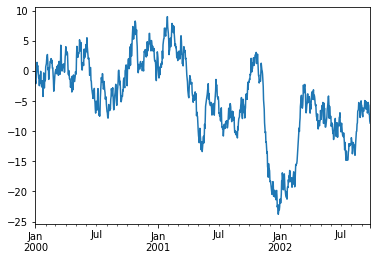

In [180]:
ts.plot()

In [183]:
df=pd.DataFrame(
    np.random.randn(1000,4), index=ts.index,columns=['A','B','C','D']
)

In [184]:
df.head()

,A,B,C,D
2000-01-01,1.077969,0.209505,1.636819,-0.634581
2000-01-02,0.994168,0.232216,1.421717,-0.126512
2000-01-03,0.082516,-0.633452,-1.424680,0.019041
2000-01-04,2.241904,-0.323279,0.255681,-1.409295
2000-01-05,0.449444,-0.939865,-1.436779,-1.716317


In [185]:
df=df.cumsum()

In [186]:
df.head()

,A,B,C,D
2000-01-01,1.077969,0.209505,1.636819,-0.634581
2000-01-02,2.072137,0.441721,3.058535,-0.761093
2000-01-03,2.154652,-0.191731,1.633855,-0.742052
2000-01-04,4.396557,-0.515010,1.889536,-2.151346
2000-01-05,4.846001,-1.454875,0.452757,-3.867663


In [187]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<AxesSubplot:>

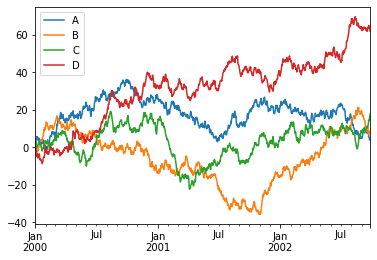

In [188]:
df.plot()

# Getting data in/out

In [190]:
df.to_csv('foo.csv')

In [191]:
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,1.077969,0.209505,1.636819,-0.634581
1,2000-01-02,2.072137,0.441721,3.058535,-0.761093
2,2000-01-03,2.154652,-0.191731,1.633855,-0.742052
3,2000-01-04,4.396557,-0.515010,1.889536,-2.151346
4,2000-01-05,4.846001,-1.454875,0.452757,-3.867663
...,...,...,...,...,...
995,2002-09-22,5.703941,6.892912,14.388171,64.715462
996,2002-09-23,5.521772,8.215401,14.150283,64.892097
997,2002-09-24,4.619939,7.761323,14.935542,63.526153
998,2002-09-25,3.836659,8.415267,16.359133,63.588651


In [198]:
%pip install openpyxl
import openpyxl

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [199]:
df.to_excel('foo.xlsx',sheet_name='Sheet1')

In [201]:
pd.read_excel('foo.xlsx','Sheet1',index_col=None,na_values=['NA'])

,Unnamed: 0,A,B,C,D
0,2000-01-01,1.077969,0.209505,1.636819,-0.634581
1,2000-01-02,2.072137,0.441721,3.058535,-0.761093
2,2000-01-03,2.154652,-0.191731,1.633855,-0.742052
3,2000-01-04,4.396557,-0.515010,1.889536,-2.151346
4,2000-01-05,4.846001,-1.454875,0.452757,-3.867663
...,...,...,...,...,...
995,2002-09-22,5.703941,6.892912,14.388171,64.715462
996,2002-09-23,5.521772,8.215401,14.150283,64.892097
997,2002-09-24,4.619939,7.761323,14.935542,63.526153
998,2002-09-25,3.836659,8.415267,16.359133,63.588651
